In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats.mstats import winsorize

In [4]:
# Load and preprocess the data
data = pd.read_csv('diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Pre-processing the data

In [9]:
#checking the columns in a dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# checking the null values
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
#checking the null values count is any is there
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
from scipy import stats
features = data.columns.tolist()
features

def remove_outliers(data,col,threshold =3.5):
    
    z_scores = np.abs(stats.zscore(data[col]))
#     print(z_scores)
    keep_indices = (z_scores < threshold).all(axis=1)
    
#     print(keep_indices)
    return data[keep_indices]




data1 = remove_outliers(data,features)
print("Number of removed rows:",len(data)-len(data1))

Number of removed rows: 67


In [14]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


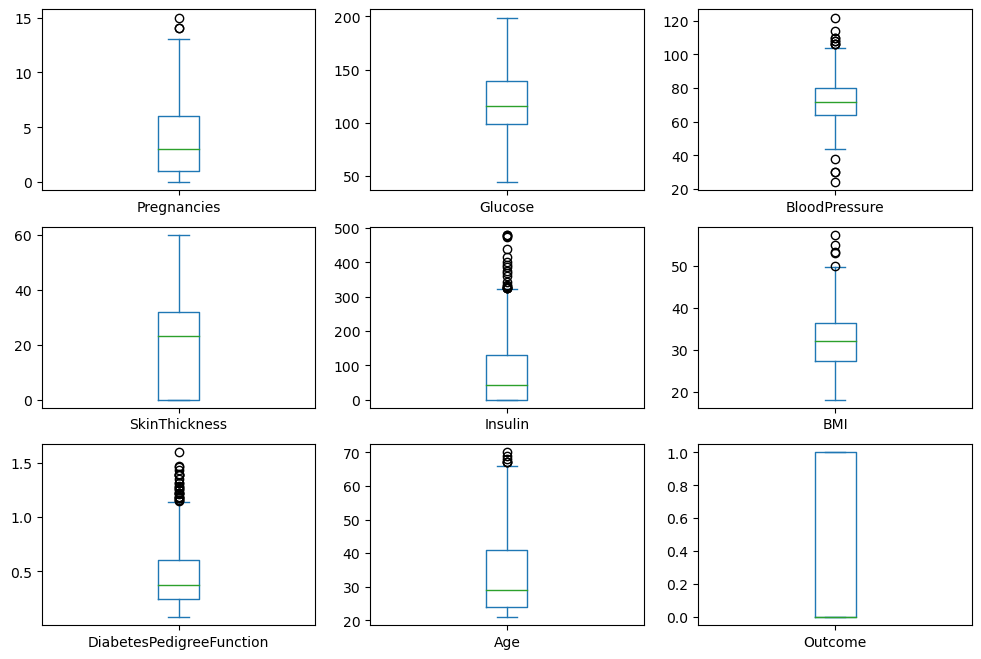

In [16]:
# Create box plots for all variables to visualize outliers
data1.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))

# Show the plot
plt.show()

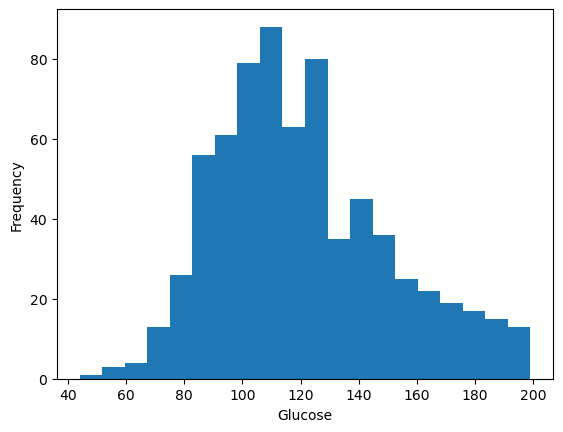

In [17]:
# Visualize the distribution of the "Glucose" variable using a histogram
plt.hist(data1['Glucose'], bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

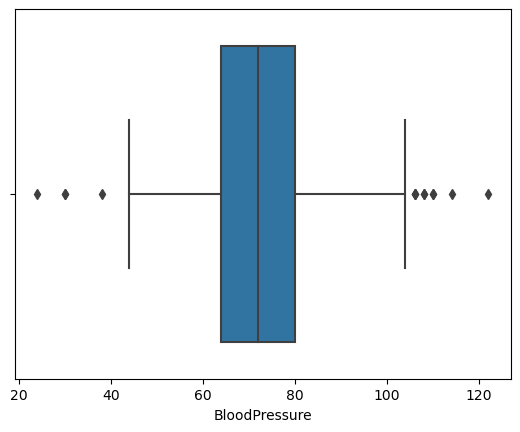

In [18]:
# Visualize the distribution of the "BloodPressure" variable using a box plot
sns.boxplot(x=data1['BloodPressure'])
plt.xlabel('BloodPressure')
plt.show()

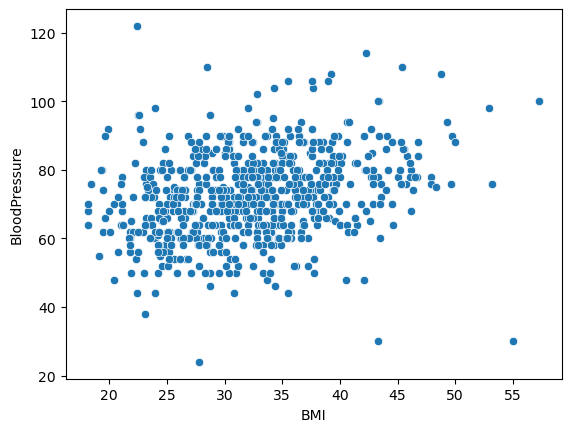

In [19]:
# Analyze the relationship between "BMI" and "BloodPressure" using a scatter plot
sns.scatterplot(data=data1, x='BMI', y='BloodPressure')
plt.show()

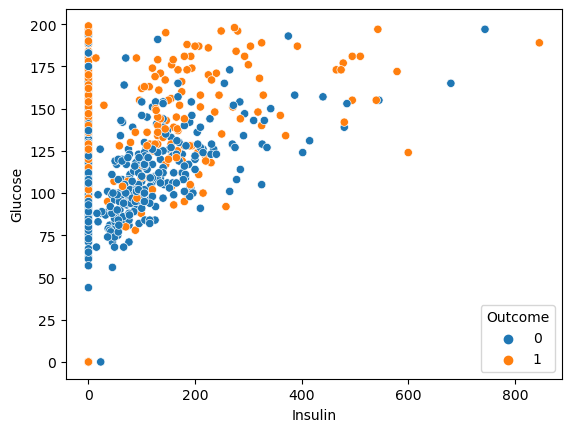

In [20]:
# Analyze the relationship between "Age" and "Glucose" by Outcome using a scatterplot plot
sns.scatterplot(data=data1, x='Insulin', y='Glucose', hue='Outcome')

plt.show()

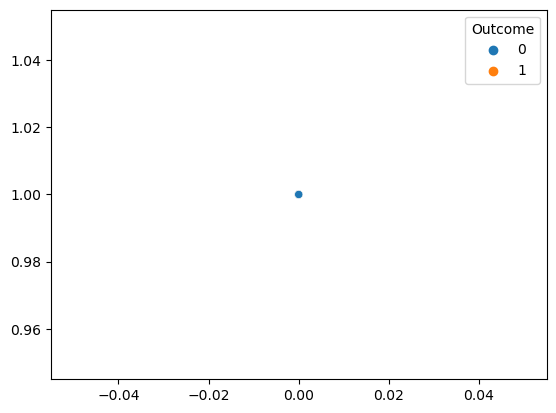

In [21]:
# Perform PCA to analyze the relationship between all the variables in the dataset
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data1.drop(columns=['Outcome']))

# Visualize the results using a scatter plot
sns.scatterplot(data=pca_result, x=0, y=1, hue=data1['Outcome'])
plt.show()

In [22]:
#preprocess the data

# Drop the 'Outcome' column and assign the remaining columns to "New_data"
New_data = data1.drop('Outcome', axis=1)

# Extract the 'Outcome' column and assign it to New_Target
New_Target=data1['Outcome']

# Scale the input features in X using the StandardScaler() function
X = StandardScaler().fit_transform(New_data)

/Users/hetpad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hetpad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hetpad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hetpad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hetpad/an

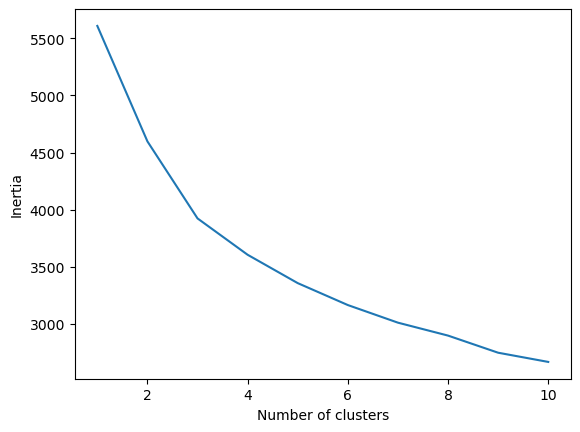

In [23]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# Based on the elbow plot, choose the number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Assign each data point to a cluster
labels = kmeans.predict(X)

# Add the cluster labels to the original dataframe
data1['Cluster'] = labels

# Print the number of points in each cluster
print(data1['Cluster'].value_counts())

0    447
1    254
Name: Cluster, dtype: int64


/Users/hetpad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/vl/g5kxs6vs42g5c8v3f06g4sf80000gn/T/ipykernel_944/4189016381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = labels


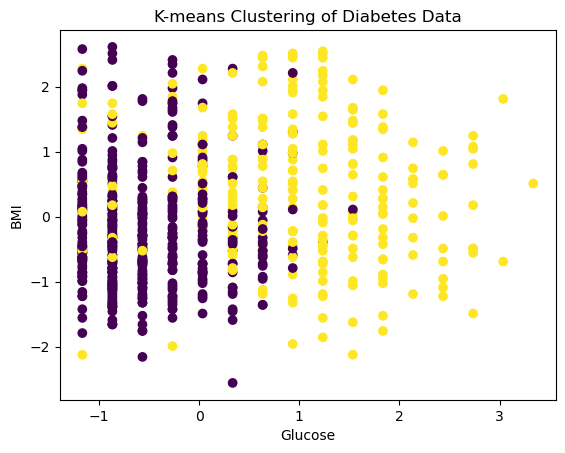

In [25]:
# Visualize the clustered data using a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-means Clustering of Diabetes Data')
plt.show()


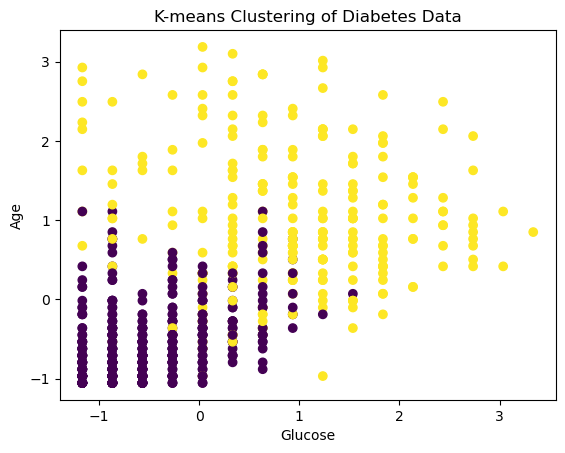

In [26]:
# Visualize the clustered data using a scatter plot
plt.scatter(X[:, 0], X[:, 7], c=labels, cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('K-means Clustering of Diabetes Data')
plt.show()

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, New_Target, test_size=0.2)

In [28]:
# Train multiple classification models and visualize the results
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()}

In [29]:
pca = PCA(n_components=2)
pca.fit(X_train)


PCA(n_components=2)

Random Forest Accuracy: 0.7943262411347518


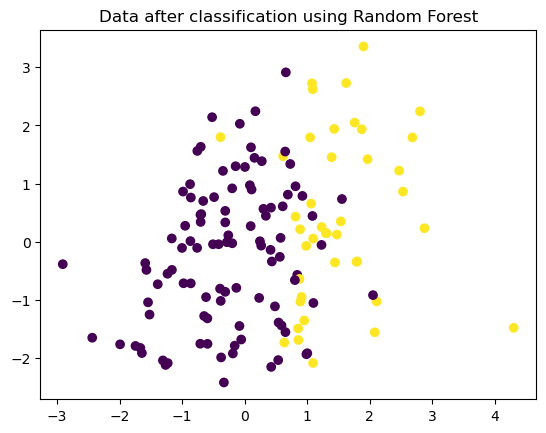

Logistic Regression Accuracy: 0.7730496453900709


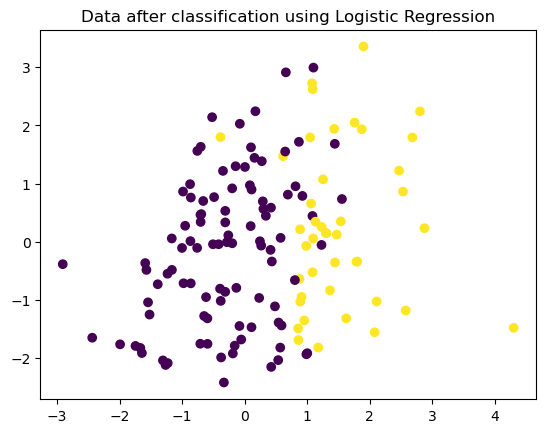

Support Vector Machine Accuracy: 0.7375886524822695


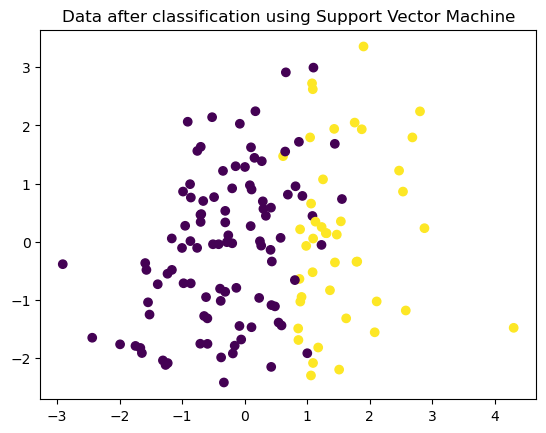

Decision Tree Accuracy: 0.7021276595744681


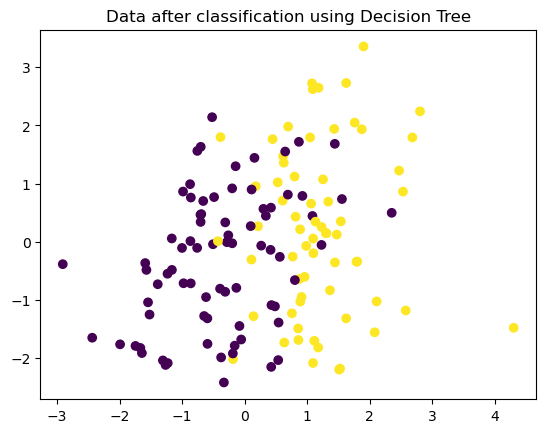


Maximum Accuracy: 0.7943262411347518 achieved using Random Forest
(141, 8)


<Figure size 640x480 with 0 Axes>

In [30]:
max_accuracy=0
max_model=""
accurac=[]


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    accurac.append(accuracy)
    # find out the maximum accuracy of all the classifed appproach
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_model = name
    
    
    X_test = np.hstack((X_test[:, :-1], y_pred.reshape(-1,1))) # add the predicted column
    X_pca = pca.transform(X_test) # remove the last column before plotting
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_test[:, -1]) # use the last column for coloring
    plt.title(f'Data after classification using {name}')
    plt.savefig(f'{name}_plot.png',dpi=350,bbox_inches='tight')
    plt.show()
    plt.savefig("scatter_plot.png")

    
    
print(f'\nMaximum Accuracy: {max_accuracy} achieved using {max_model}')   
    
print(X_test.shape)

In [31]:
print(X_test.shape)

(141, 8)


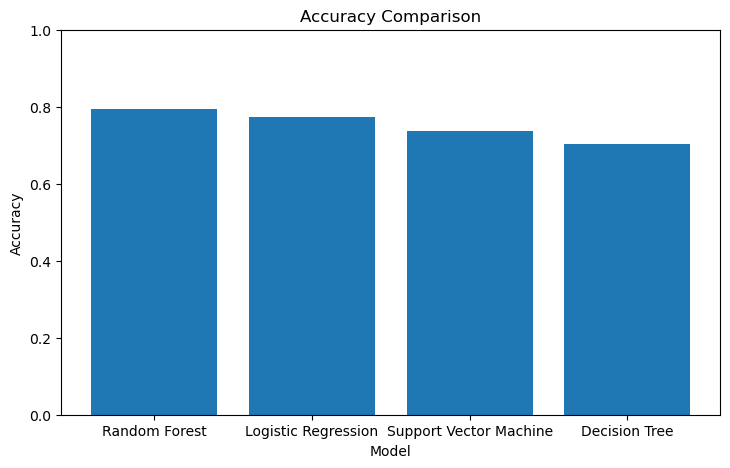

In [32]:
# plot the accuracies
fig = plt.figure(figsize=(8.5, 5))
plt.bar(models.keys(), accurac)
plt.ylim([0, 1])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig(f'Accuracy_plot.png',dpi=350,bbox_inches='tight')
plt.show()

## Improving the model based on removing the outliers

In [22]:
data_o = data.drop(columns="Outcome")

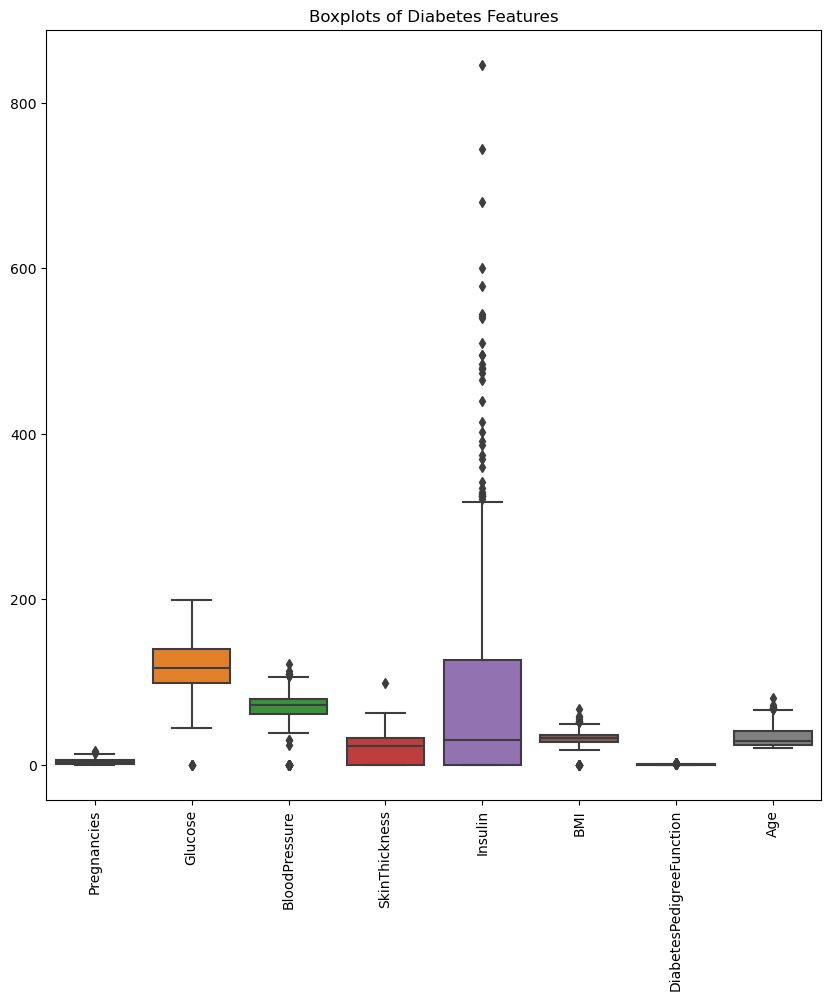

In [23]:
plt.figure(figsize=(10,10 ))
sns.boxplot(data=data_o)
plt.title('Boxplots of Diabetes Features')

plt.xticks(rotation= 90)

# Show the plot
plt.show()

In [24]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
Insulin = data['Insulin']
winsorized_Insulin = winsorize(Insulin, limits=[0.05, 0.05])

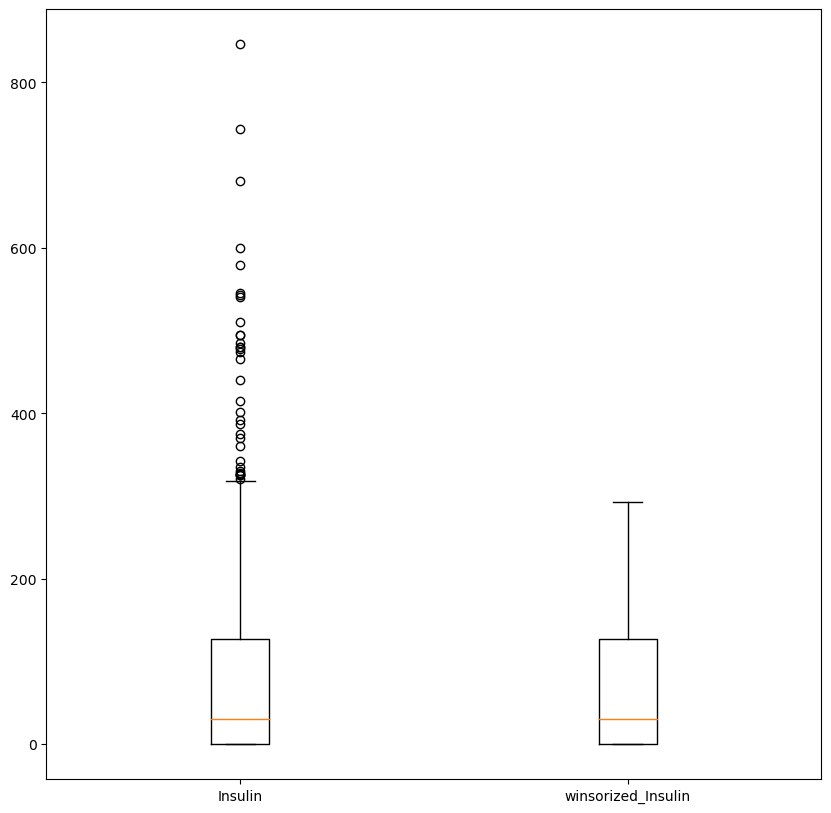

In [31]:
plt.figure(figsize=(10,10))
plt.boxplot([Insulin,winsorized_Insulin],labels=['Insulin','winsorized_Insulin'])
plt.show()